# Model for clothing classification example

## Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load the data

In [2]:
(train_img, train_lbl), (test_img, test_lbl) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_img.shape

(60000, 28, 28)

i.e. 60000 images, 28x28 pixels in dimensions

In [4]:
train_lbl.shape

(60000,)

60000 labels corresponding to each image

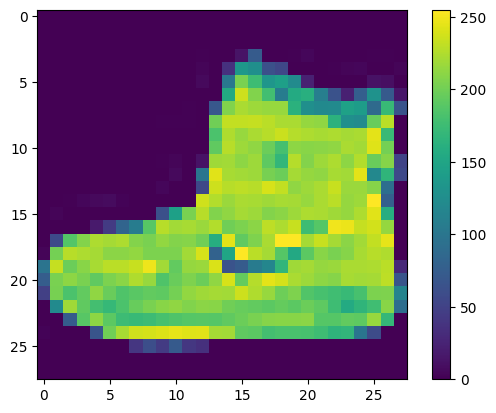

In [5]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

Note that each pixel in a picture has a value ranging from 0 to 255. Hence, we need to normalize the images before feeding those to NN by dividing by 255

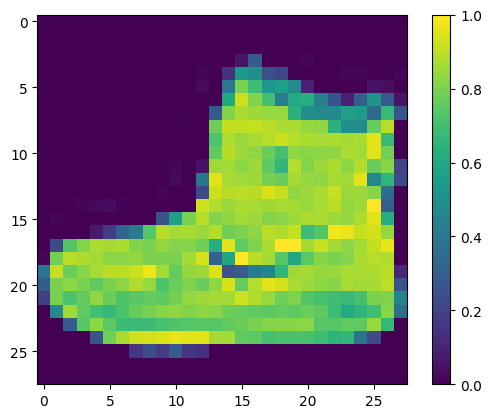

In [6]:
train_img = train_img/255
test_img = test_img/255

plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

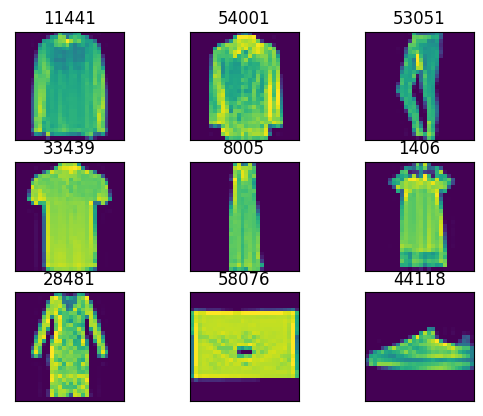

In [7]:
idx = []

for i in range(9):
    idx.append(np.random.randint(1,60000))

idx = np.asarray(idx)

fig = plt.figure()

for i in range(len(idx)):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(train_img[idx[i]])
    ax.title.set_text(idx[i])
    ax.set_xticks([])
    ax.set_yticks([])

## Define a DL model

Start with a regular model with dense layers

In [8]:
# Can define how many neurons we want to have in the first layer
# (choose optimal value to balance between speed of the model and output accuracy)
neurons=128

In [9]:
model = tf.keras.Sequential([
    #   First layer flattens a 2d array of 28x28 into 1d numpy array with 28x28=784 elements
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # second layer takes the input and applies weights to it and
    # passes the result through activation function
    tf.keras.layers.Dense(neurons, activation='relu'),

    # last layers which makes a prediction. Each neuron
    # has a value which indicates probability of the image 
    # belonging to one of the classes
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(
#   Optimizer —This is how the model is updated based on the data it sees and its loss function.
              optimizer='adam',

#   Loss function — This measures how accurate the model is during training.
#   You want to minimize this function to "steer" the model in the right direction.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

#   Metrics —Used to monitor the training and testing steps. 
              metrics=['accuracy'])

## Train the model

In [11]:
hist = model.fit(train_img, train_lbl, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5009 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3759 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3370 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3133 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2928 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2805 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2670 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2572 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2472 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.236

Accuracy for 10 epochs: 0.911

More epochs = more accuracy (Or not, can overfit)

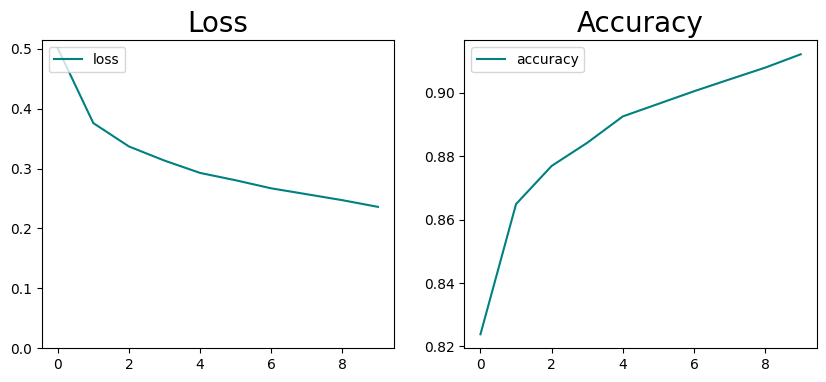

In [12]:
fig = plt.figure(figsize = (10,4))

ax = fig.add_subplot(121)
ax.plot(hist.history['loss'], color='teal', label='loss')
ax.set_title('Loss', fontsize=20)
ax.set_ylim(bottom=0)
ax.legend(loc="upper left")

ax1 = fig.add_subplot(122)
ax1.plot(hist.history['accuracy'], color='teal', label='accuracy')
ax1.set_title('Accuracy', fontsize=20)
ax1.legend(loc="upper left")

plt.show()

## Test the model

Define list of class names

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
prd = model.predict(test_img)

313/313 [==============================] - 0s 1ms/step


In [15]:
from keras.metrics import Accuracy

In [16]:
accuracy = Accuracy()

In [17]:
yhat = []

for i in range(10000):
    yhat.append(np.argmax(prd[i][:]))

yhat = np.asarray(yhat)

In [18]:
accuracy.update_state(test_lbl, yhat)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=10000.0>

In [19]:
print(f'accuracy: {accuracy.result().numpy()}')

accuracy: 0.8813999891281128


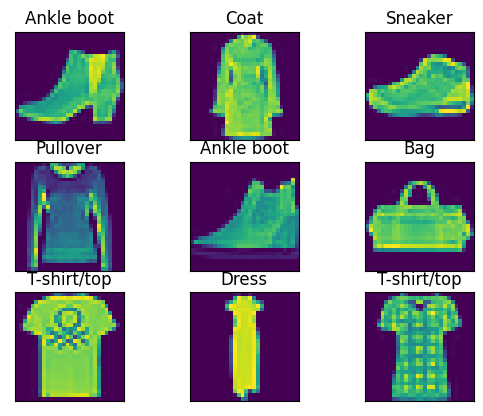

In [20]:
idx = []

for i in range(9):
    idx.append(np.random.randint(1,10000))

idx = np.asarray(idx)

fig = plt.figure()

for i in range(len(idx)):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(test_img[idx[i]])
    ax.title.set_text(class_names[np.argmax(prd[idx[i]])])
    ax.set_xticks([])
    ax.set_yticks([])

## Summary

The testing accuracy showed to be 0.88

Next task: try to improve that by adding convolutional layer(s)

***

# Convolutional Neural Network

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Conv2D - convolves the image with a filter. Size of the convolution layer determines amount of random filters applied to the picture

MaxPooling2D - condenses the result of a convolution.

Dense - layer which outputs classification of the input. (simple layer of neurons in which each neuron receives input from all the neurons of previous layer)

Flatten - Cannot pass output of convolutional layer directly to the dense layer because output of convolutional layer is in multi-dimensional shape and dense layer requires input in <br/> single-dimensional shape i.e. 1-D array. Flatten converts multi-dimensional matrix to single dimensional matrix. Used betveen Convolution & Dense layers.

![ConvUrl](https://mlnotebook.github.io/img/CNN/convSobel.gif "Conv2D")

Source: https://mlnotebook.github.io/post/CNN1/

![MaxPooling](https://cdn-images-1.medium.com/max/1000/1*lRVHY6UXH7K5sfr9L_YVvg.gif "MaxPooling")

Source: https://towardsdatascience.com/introduction-to-convolutional-neural-network-cnn-de73f69c5b83#:~:text=Dense%20Layer%20is%20used%20to,on%20output%20from%20convolutional%20layers.&text=Each%20Layer%20in%20the%20Neural,as%20an%20%E2%80%9Cactivation%20function%E2%80%9D.

In [22]:
model_cnn = tf.keras.Sequential()

In [23]:
model_cnn.add(Conv2D(128, kernel_size=(2,2), input_shape=(28, 28, 1), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(10))

Kernel size specifies width & height of the convolution window. Since input shape is (28,28), specify the number of channels to be 1 instead of 3

In [24]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [25]:
train_img[0].shape

(28, 28)

In [26]:
hist_cnn = model_cnn.fit(train_img, train_lbl, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3869 - accuracy: 0.8638
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2712 - accuracy: 0.9038
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2331 - accuracy: 0.9156
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2033 - accuracy: 0.9265
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1806 - accuracy: 0.9350
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1601 - accuracy: 0.9426
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1437 - accuracy: 0.9485
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1284 - accuracy: 0.9547
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1152 - accuracy: 0.9584
Epoch 10/10
1875/1875 [==============================] - 26s 14m

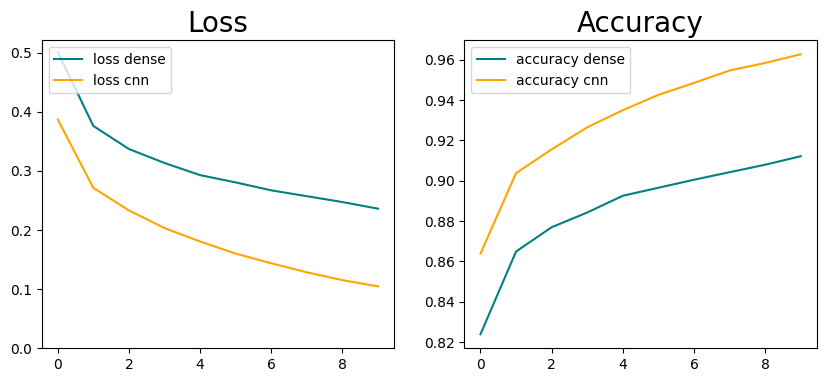

In [27]:
fig1 = plt.figure(figsize = (10,4))

ax2 = fig1.add_subplot(121)
ax2.plot(hist.history['loss'], color='teal', label='loss dense')
ax2.plot(hist_cnn.history['loss'], color='orange', label='loss cnn')
ax2.set_title('Loss', fontsize=20)
ax2.set_ylim(bottom=0)
ax2.legend(loc="upper left")

ax3 = fig1.add_subplot(122)
ax3.plot(hist.history['accuracy'], color='teal', label='accuracy dense')
ax3.plot(hist_cnn.history['accuracy'], color='orange', label='accuracy cnn')
ax3.set_title('Accuracy', fontsize=20)
ax3.legend(loc="upper left")

plt.show()

## Test the model

In [28]:
prd_cnn = model_cnn.predict(test_img)

313/313 [==============================] - 1s 5ms/step


In [29]:
accuracy_cnn = Accuracy()

In [30]:
yhat_cnn = []

for i in range(10000):
    yhat_cnn.append(np.argmax(prd_cnn[i][:]))

yhat_cnn = np.asarray(yhat_cnn)

In [31]:
accuracy_cnn.update_state(test_lbl, yhat_cnn)

print(f'accuracy (cnn): {accuracy_cnn.result().numpy()}')
print(f'accuracy (dense): {accuracy.result().numpy()}')

accuracy (cnn): 0.892799973487854
accuracy (dense): 0.8813999891281128


## Summary

It can be seen that convolutional layer results in a better accuracy of the model. However, it does not give any insight on overfitting of the model.

However, this can be improved even further by considering different layer layouts and # of epochs

The next goal is to manipulate amount of epochs to overfit the model (or any other way) and introduce regularisation (stop training when loss begins to grow)